Import counts data and keep only variables of species counts

In [19]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from plotnine import *
import pandas as pd

counts = pd.read_csv("derived_data/counts_area_sl.csv");

counts2 = counts.drop(['Park.Name', 'Park.Code', 'State', 'Acres', 'Latitude', 'Longitude', 'Size', 'LatCat2'], axis=1);


In [7]:
counts2.head(5)

,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
0,0,15,364,0,38,0,0,0,55,0,11,0,0,1226
1,0,8,205,0,11,0,0,0,59,0,20,0,0,745
2,0,10,239,0,24,173,239,1,64,0,13,0,1,625
3,0,13,415,0,53,0,0,0,89,48,62,0,0,1589
4,0,8,233,0,818,0,11,34,28,0,40,0,0,554


Create histogram of pairwise distances

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


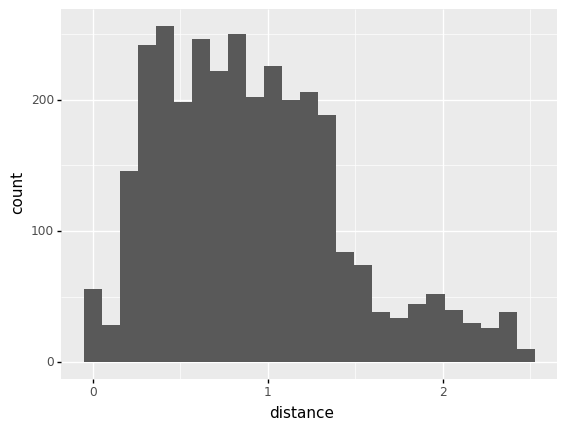

<ggplot: (8775367416119)>

In [18]:
mms = MinMaxScaler();
normed = mms.fit_transform(counts2)
distances = pairwise_distances(normed)

(ggplot(pd.DataFrame({"distance":distances.reshape(np.product(distances.shape))}), aes("distance")) + geom_histogram())

Do dimensionality reduction with TSNE (3 clusters)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.


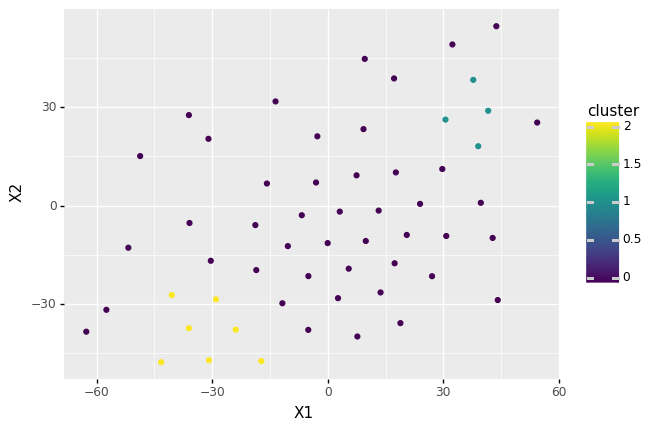

<ggplot: (8775359311550)>

In [41]:
from sklearn.manifold import TSNE

adj = distances < 0.5

sc = SpectralClustering(3,affinity="precomputed")
counts2['cluster'] = sc.fit_predict(adj);

projection = TSNE(n_components=2).fit_transform(normed);
lowd3 = pd.DataFrame(projection, columns=["X1","X2"]);
lowd3["cluster"] = counts2["cluster"];

(ggplot(lowd3,aes("X1","X2")) + geom_point(aes(color="cluster")))

Write results to CSV file to use in R markdown

In [43]:
lowd3.to_csv('derived_data/lowd3.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.


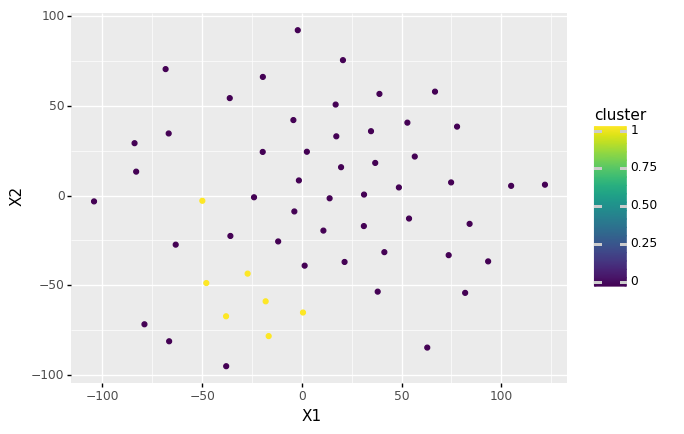

<ggplot: (8775359332645)>

In [42]:
from sklearn.manifold import TSNE

adj = distances < 0.5

sc = SpectralClustering(2,affinity="precomputed")
counts2['cluster'] = sc.fit_predict(adj);

projection = TSNE(n_components=2).fit_transform(normed);
lowd2 = pd.DataFrame(projection, columns=["X1","X2"]);
lowd2["cluster"] = counts2["cluster"];

(ggplot(lowd2,aes("X1","X2")) + geom_point(aes(color="cluster")))

In [44]:
lowd2.to_csv('derived_data/lowd2.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.


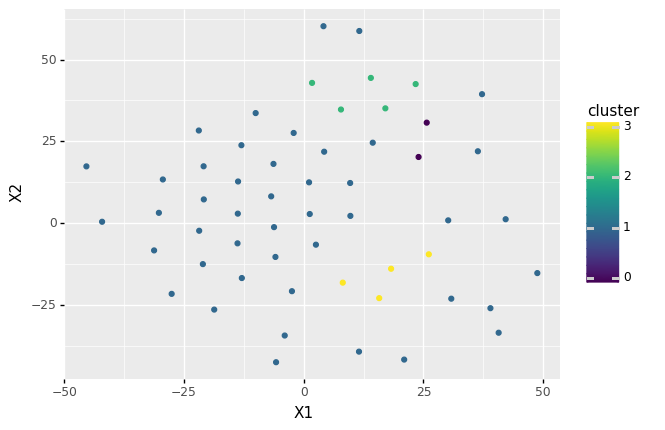

<ggplot: (8775359323895)>

In [45]:
from sklearn.manifold import TSNE

adj = distances < 0.5

sc = SpectralClustering(4,affinity="precomputed")
counts2['cluster'] = sc.fit_predict(adj);

projection = TSNE(n_components=2).fit_transform(normed);
lowd4 = pd.DataFrame(projection, columns=["X1","X2"]);
lowd4["cluster"] = counts2["cluster"];

(ggplot(lowd4,aes("X1","X2")) + geom_point(aes(color="cluster")))

In [46]:
lowd4.to_csv('derived_data/lowd4.csv')